
Dataset: Selectively Colored Fashion-MNIST: for classes 2, 4, 6, 8 ,10 random color was given 



Trained on: Selectively Randomly Colored Fashion-MNIST

Tested on: GrayScale Fashion-MNIST & Selectively Randomly Colored Fashion-MNIST

Model: CNN with 2 Conv Layers, 2 Max Pooling Layers, and 2 Fully Connected Layers


In [1]:
import os


os.chdir('../../experiments')

# print("Current working directory:", os.getcwd())

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import random


# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:

directory = "../data"
files = os.listdir(directory)
files

['CustomColoredFashionMNIST', 'FashionMNIST', 'MNIST']

In [4]:
grey_transform = transforms.Compose([
    # Convert grayscale to 3-channel RGB
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
                         )  # Normalize for 3 channels

])

In [5]:
train_batch_size = 64
test_batch_size = 128

In [6]:
grey_train_dataset = datasets.FashionMNIST(
    directory, train=True, download=True, transform=grey_transform)

grey_test_dataset = datasets.FashionMNIST(
    directory, train=False, transform=grey_transform)

grey_train_loader = DataLoader(
    grey_train_dataset, batch_size=train_batch_size, shuffle=True)
grey_test_loader = DataLoader(
    grey_test_dataset, batch_size=test_batch_size, shuffle=False)

In [7]:
class CustomColoredFashionMNIST(datasets.FashionMNIST):
    def __init__(self, root, train=True, transform=None, target_classes=None, **kwargs):
        super().__init__(root, train=train, transform=transform, **kwargs)
        self.target_classes = target_classes if target_classes is not None else []

    def __getitem__(self, index):
        image, label = super().__getitem__(index)
        image = image.expand(3, -1, -1)  # Convert grayscale to RGB

        # Apply random color transform for specific classes
        if label in self.target_classes:

            # Random factors for RGB channels
            random_colors = torch.rand(3, 1, 1)
            image = image * random_colors
            image = torch.clamp(image, 0, 1)  # Ensure values are within [0, 1]

        return image, label


basic_transform = transforms.Compose([
    transforms.ToTensor(),
])

In [8]:
target_classes = [2, 4, 6, 8, 10]

selective_train_dataset = CustomColoredFashionMNIST(
    root=directory, train=True, transform=basic_transform, download=True, target_classes=target_classes)
selective_train_loader = DataLoader(
    selective_train_dataset, batch_size=train_batch_size, shuffle=False)

selective_test_dataset = CustomColoredFashionMNIST(
    root=directory, train=False, transform=basic_transform, download=True, target_classes=target_classes)
selective_test_loader = DataLoader(
    selective_test_dataset, batch_size=test_batch_size, shuffle=False)

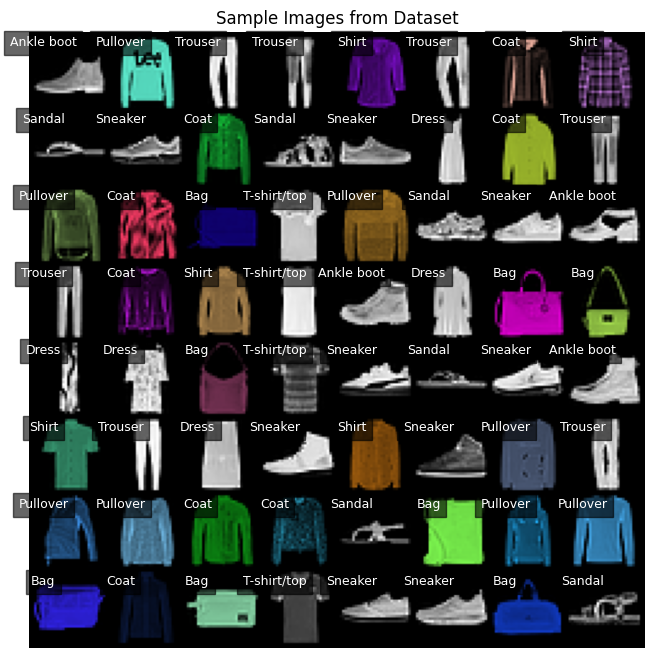

In [9]:
fashion_mnist_classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


def show_images_from_loader(loader, classes=fashion_mnist_classes, n_images=64):

    # Get a batch of images and labels
    images, labels = next(iter(loader))

    # Select n_images from the batch
    images, labels = images[:n_images], labels[:n_images]

    # Create a grid of images
    grid = utils.make_grid(images, nrow=int(
        n_images**0.5), padding=2, normalize=True)

    plt.figure(figsize=(8, 8))
    # Convert from (C, H, W) to (H, W, C) for plotting
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis('off')
    plt.title("Sample Images from Dataset")

    for i, label in enumerate(labels):
        row, col = divmod(i, int(n_images**0.5))
        plt.text(col * (grid.size(2) / n_images**0.5) + 5,
                 row * (grid.size(1) / n_images**0.5) + 5,
                 classes[label.item()],
                 color='white', fontsize=9, ha='center', bbox=dict(facecolor='black', alpha=0.6))
    plt.show()


show_images_from_loader(selective_test_loader)

Train on the selectively colored set

In [10]:
from train import train, test
from cnn import _2LayerCNN

In [11]:
model = _2LayerCNN().to(device)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [12]:
for epoch in range(1, 5):
    train(model, device, selective_train_loader, optimizer, epoch)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309353
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.523446
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.304252
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.486117
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.290217
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.412793
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.248908
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.438311
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.386478
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.424455
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.193779
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.243089
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.158528
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.263501
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.199822
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.276981
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.163035
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.299760
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.312592
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.252578
Train Epoch:

In [13]:
test(model, device, selective_test_loader)


Test set: Average loss: 0.0015, Accuracy: 9320/10000 (93.20%)



In [14]:
test(model, device, grey_test_loader)


Test set: Average loss: 0.7685, Accuracy: 2097/10000 (20.97%)



perform ood detection

In [15]:
from ood_detection import OODDetection

In [16]:
ood_detector = OODDetection(model, device)

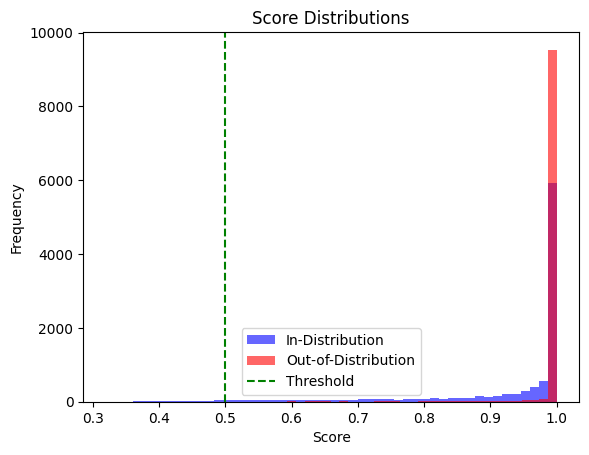

Threshold OOD Detection: Softmax Threshold = 0.50 with scoring function: <function OODDetection.max_confidence at 0x000002659A11F6A0>
In-Distribution Detection Rate: 0.98
Out-of-Distribution Detection Rate: 0.02
OOD samples classified as ID: 99.96%
OOD samples classified as OD: 0.04%


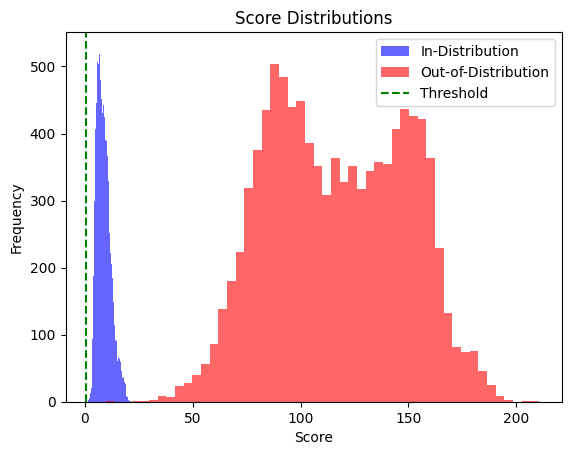

Threshold OOD Detection: Softmax Threshold = 0.50 with scoring function: <function OODDetection.energy_score at 0x000002659A11F4C0>
In-Distribution Detection Rate: 1.00
Out-of-Distribution Detection Rate: 0.00
OOD samples classified as ID: 100.00%
OOD samples classified as OD: 0.00%


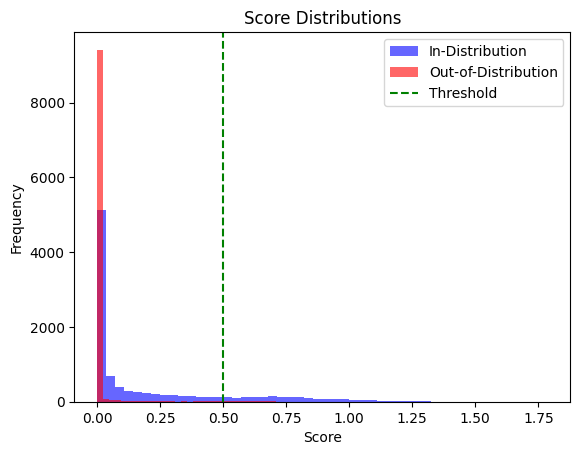

Threshold OOD Detection: Softmax Threshold = 0.50 with scoring function: <function OODDetection.entropy_score at 0x000002659A11F740>
In-Distribution Detection Rate: 0.17
Out-of-Distribution Detection Rate: 0.83
OOD samples classified as ID: 1.54%
OOD samples classified as OD: 98.46%
Logistic Regression OOD Detection: Decision Threshold = 0.50
In-Distribution Detection Rate: 1.00
Out-of-Distribution Detection Rate: 1.00
OOD samples classified as ID: 0.02%
OOD samples classified as OD: 99.98%


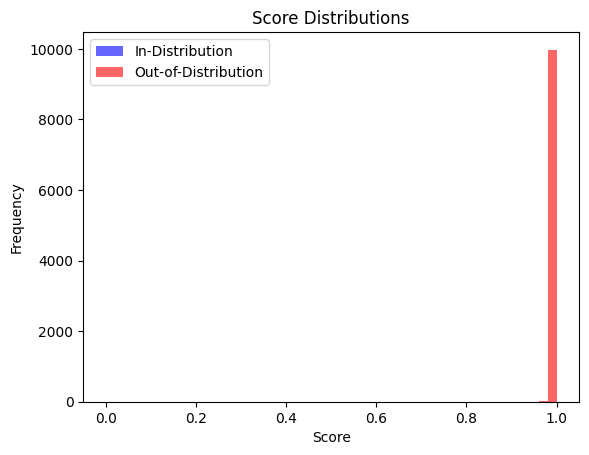

In [17]:
results = ood_detector.run_all_methods(selective_test_loader, grey_test_loader)